In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
GaussianMix = GaussianMixture.symmetric_2D(5,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model1)

trainer.train_loop(num_epochs=5000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 5.3196797370910645
In Epoch 1000 we have a loss of 6.212916374206543
In Epoch 2000 we have a loss of 13.034818649291992
In Epoch 3000 we have a loss of 7.645693778991699
In Epoch 4000 we have a loss of 6.440033435821533


In [3]:
swiss = SwissRoll2D(device)

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="Diffusion", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 9.18497085571289
In Epoch 1000 we have a loss of 6.159117698669434
In Epoch 2000 we have a loss of 6.153153896331787
In Epoch 3000 we have a loss of 5.694979667663574
In Epoch 4000 we have a loss of 5.600101470947266
In Epoch 5000 we have a loss of 4.994719982147217
In Epoch 6000 we have a loss of 6.358427047729492
In Epoch 7000 we have a loss of 7.828220844268799
In Epoch 8000 we have a loss of 7.8071112632751465
In Epoch 9000 we have a loss of 3.958082675933838
In Epoch 10000 we have a loss of 13.000993728637695
In Epoch 11000 we have a loss of 9.017029762268066
In Epoch 12000 we have a loss of 13.225351333618164
In Epoch 13000 we have a loss of 3.5641677379608154
In Epoch 14000 we have a loss of 5.317570686340332
In Epoch 15000 we have a loss of 249.92721557617188
In Epoch 16000 we have a loss of 3.8629863262176514
In Epoch 17000 we have a loss of 7.991820335388184
In Epoch 18000 we have a loss of 9.045771598815918
In Epoch 19000 we have a loss of 7.4738

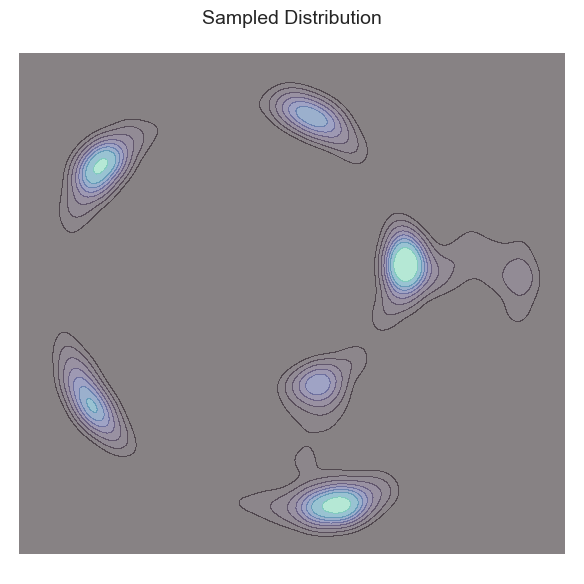

In [4]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

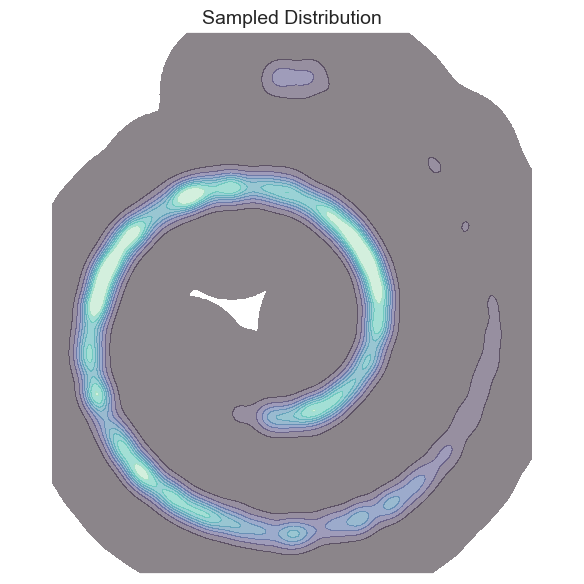

In [5]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

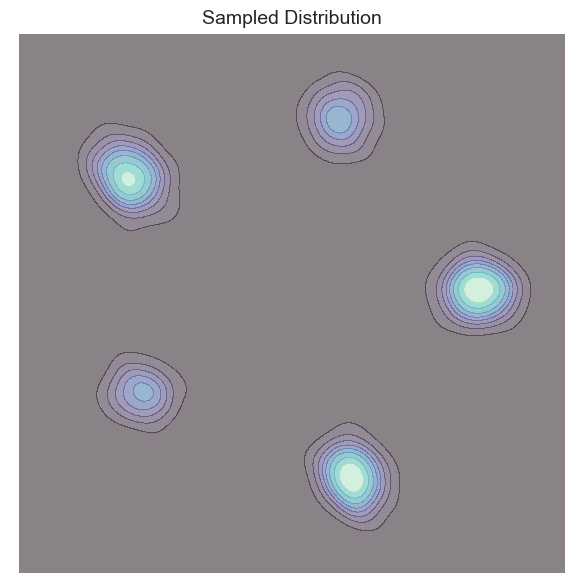

In [6]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)